In [47]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import plotly.express as px
from summarytools import dfSummary
from sklearn.preprocessing import power_transform
from sklearn.cluster import KMeans

In [48]:
data = pd.read_csv('BankChurners.csv')

In [49]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [50]:
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CLIENTNUM[int64],Mean (sd) : 739177606.3 (36903783.5)min < med < max:708082083.0 < 717926358.0 < 828343083.0IQR (CV) : 60106762.5 (20.0),"10,127 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC40lEQVR4nO3YsW7aUBSA4XMhQdcQ7hUhJVuWbonUASkLD9AxD5tH6MDQtRm6MGWJUBAyjYOFZdyhTdWqCuBrEDnk/2aObVm/uAdMURQCvHW1fT8AsImjdR8wxkQi0gi8/qIoinngLPDHylCNMVG3271xznVCLj6bzabGmFtiRVXrvlEbzrnOYDCYe+/TMheO49gOh8POZDJpiAihopK1R7+IiPc+7fV6zwHXjwJmgP/wYwoqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQ4WjfD3CIjDGRiDQCxxdFUcy3+TyHgFC3zBgTdbvdG+dcJ2R+NptNjTG3xPovQt2+hnOuMxgM5t77tMxgHMd2OBx2JpNJQ0QI9S87DTXP82MRccaY0EuoPQa992mv13suO5fnuZN3+s5W2VmoSZIcZ1n26eLiol6v10t9s7x4b8cg7+x1Owt1sVgcWWub/X4/PT8/n5adf4/HIO/sdTvfUVutVtAR+Fu01YdRYl/vrOK/FSK//u5cBs6uXFn4MXVgKvwusKenp5+9963Q+yZJ8vHk5GRUq9WysvPrVhZCPSBVdtwsy6yIXF1fX389Ozublb33/f195+7u7kO/3/9edm3ZZGUh1FdUOAbdcrk83vbzbKLKjvs7tKa1NgtZO6bTaSRSaW1ZubK86VAr/r1VZV8KPgazLLN5nl+lafpFREL3zEpCYnkJ7a3aKNQ4jm3ZCz89PVkRkSRJ7Hg8bpadf3h4aIceY1X3pZdj8PLy8lu73f5RZvbx8dGORqNmHMet8Xi8KDNb9Z1Vmd/nvTfp6yeJ80MUZUbkNQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Attrition_Flag[object],1. Existing Customer2. Attrited Customer,"8,500 (83.9%)1,627 (16.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABMUlEQVR4nO3bQWrDMBRF0adiQjORMAYvxovoYrsI7cYYa9CETNRByRL+swr3bOAHchNI8Eu9dwEOSdJd0u3qF4LLvXrvj8gD07IsXznnOfIIxtdaO1JK35HBTTnnedu2RynlGXUEYzvP87PWOu/7fpMUF5sklVKe67r+RB3Bv3CPPvARfQB4IzbYEBtsiA02xAYbYoMNscGG2GBDbLAhNtgQG2yIDTbEBhtigw2xwWaS/h6eu/qF4Dqu939qrR211lmGh+cwrtbaIekVeYPBC97CBy+JKR9cXN9s4Z8ajM8y5XPMxDC+8CmfayaG8bmmfPzSBX/qwofYYENssCE22BAbbIgNNsQGG2KDDbHBhthgQ2ywITbYEBtsiA02xAab8CkfM0G8WaZ8jpkYxsfgBTa/Cltq33c4jS0AAAAASUVORK5CYII="">",0(0.0%)
3,Customer_Age[int64],Mean (sd) : 46.3 (8.0)min < med < max:26.0 < 46.0 < 73.0IQR (CV) : 11.0 (5.8),45 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACj0lEQVR4nO3dPY7aQBiH8f+EDxmQbCEk6LhApBSUHCKHzRFScAJuQIe0QiC862CMU6SKBLvgj915h+fXT9bFI2RPxq9dWZYCfPftqy8AuEf3qy/AV865gaR+xeWnsizfmryeZ0eoVzjnBpPJ5Gccx+Mq6w+Hw84594tYm0Oo1/XjOB4vl8u3JEmyRxbu9/totVqNX15e+pIItSGE+o4kSbLpdPpaYemg8Yt5cjxMwQRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJ/BdqC4qi6EmKnXNVlnPy6gpCbViapr08z3/M5/NOp9N56ECLxMmrWwi1YafTqRtF0XCxWGSz2Wz3yFpOXt1GqC0ZjUacvGpQsKHWPKEfXy6XXpPXg3qCDLXuCf08z6OiKL5nWfZbUpVfRTQsyFBV44S+JG02m/F6vR6ez+dOGxeHx4UaqqTqJ/R3ux33iZ5hwx8mECpMIFSYQKgwweuHqRp7oeyDBsbbUOvshbIPGh5vQ1WNvVD2QcPjc6iSqu2Fsg8aHh6mYAKhwgRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJhAoTvD+U8mxqzq2SAp1dRageqTu3Sgp3dhWheqTO3Cop7NlVhOqhGnOrpEBnV/EwBRMIFSYQKkxo9R6V0Y9oSmuhMvoRTWrzF5XRj2hM69tTjH78XKF+kYV91ICE/EUWQg1IyF9kIdQAhfhFFvZRYQKhwgRChQmEChM+fJhi6jN88G6oTH2GLz76RWXqM7xw1z4qU5+fg88vFrLhD0n+v1hIqJDk/4uFhIr/+Ppi4V2h7vf76NF/+Hg8RpKUpmm03W6Hn7ne6t+2et3Sv0aKouiq+j3un7Isb95y/AUcdZM5QwCg9AAAAABJRU5ErkJggg=="">",0(0.0%)
4,Gender[object],1. F2. M,"5,358 (52.9%)4,769 (47.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABO0lEQVR4nO3bQWrDMBRF0a8iQjORMAYvxovoYrsI7cYYa5CETJRBx8GCiie7vWcFH3MxJPi5UooBCs7MrmZ26X3IH/Aspdx7H3FkfhzHrxDC0PuQs8s5r865b4J7z4cQhnme7zHGR+9jzmrbts+U0rAsy8XMiO0Nb2YWY3xM03TrfczJXXsfcHQfvQ/A/0FskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoOMN/v5+K/3IWfG86vjc85rSmkwPv77lZzzambP3nccGYOXdh

In [51]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

<Axes: xlabel='Total_Trans_Ct', ylabel='Count'>

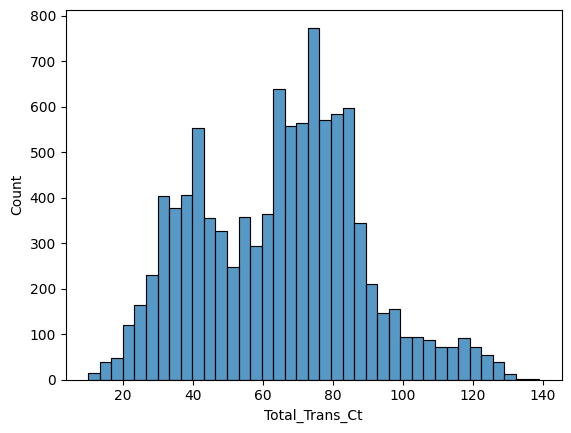

In [52]:
sns.histplot(data = data, x='Total_Trans_Ct')

In [53]:
data["Attrition_Flag"] = data["Attrition_Flag"].map({"Existing Customer":1, "Attrited Customer":2})

<Axes: xlabel='Attrition_Flag', ylabel='Count'>

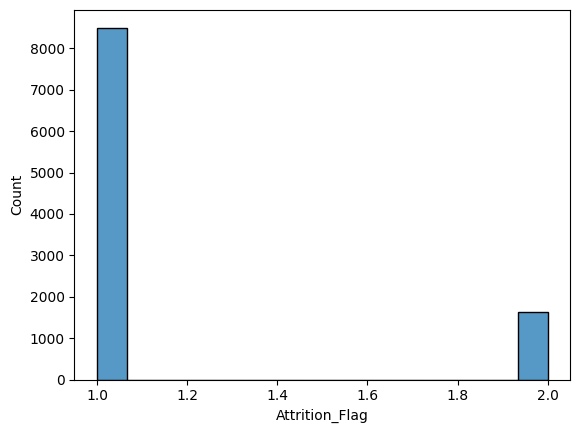

In [54]:
sns.histplot(data = data, x='Attrition_Flag')

<Axes: xlabel='Contacts_Count_12_mon', ylabel='Count'>

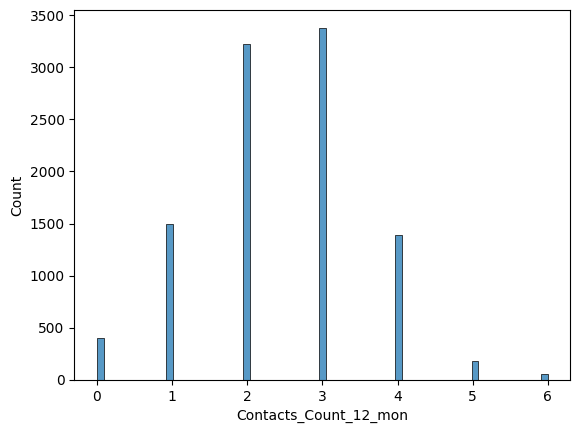

In [55]:
sns.histplot(data = data, x='Contacts_Count_12_mon')

In [56]:
data_clean = data[['Total_Trans_Ct', 'Attrition_Flag', 'Contacts_Count_12_mon']]
data_clean

,Total_Trans_Ct,Attrition_Flag,Contacts_Count_12_mon
0,42,1,3
1,33,1,2
2,20,1,0
3,20,1,1
4,28,1,0
...,...,...,...
10122,117,1,3
10123,69,2,3
10124,60,2,4
10125,62,2,3


In [57]:
data_clean.describe()

,Total_Trans_Ct,Attrition_Flag,Contacts_Count_12_mon
count,10127.000000,10127.000000,10127.000000
mean,64.858695,1.160660,2.455317
std,23.472570,0.367235,1.106225
min,10.000000,1.000000,0.000000
25%,45.000000,1.000000,2.000000
50%,67.000000,1.000000,2.000000
75%,81.000000,1.000000,3.000000
max,139.000000,2.000000,6.000000


In [58]:
data_clean

,Total_Trans_Ct,Attrition_Flag,Contacts_Count_12_mon
0,42,1,3
1,33,1,2
2,20,1,0
3,20,1,1
4,28,1,0
...,...,...,...
10122,117,1,3
10123,69,2,3
10124,60,2,4
10125,62,2,3


<Axes: >

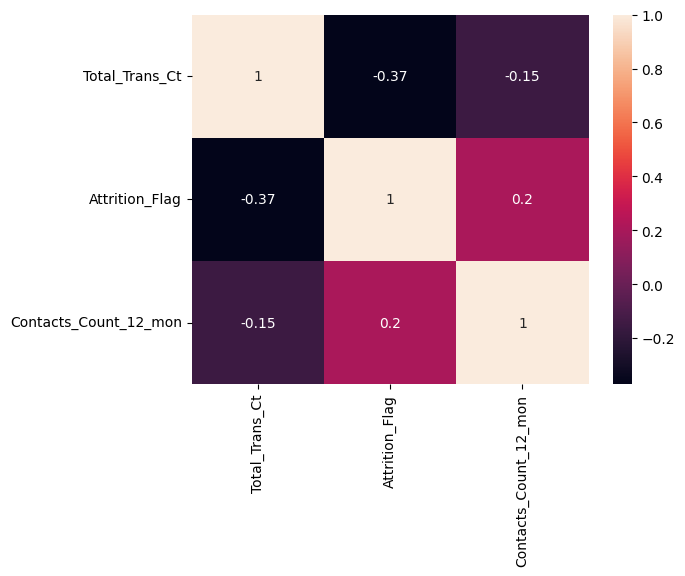

In [59]:
sns.heatmap( data_clean[['Total_Trans_Ct', 'Attrition_Flag', 'Contacts_Count_12_mon']].corr(),annot=True)

Método IQR

In [60]:
temp = pd.DataFrame()

for col in data_clean.columns:
    column = data_clean[col]
 
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)

    IQR = Q3 - Q1
    
    umbral_inferior = Q1 - 1.5 * IQR
    umbral_superior = Q3 + 1.5 * IQR

    data_clean[col + '_outliers'] = (column < umbral_inferior) | (column > umbral_superior)

    #temp[col + '_outliers'] = ((column < umbral_inferior) | (column > umbral_superior))

    print(f'{Q1 =} {Q3=} {IQR =} {umbral_inferior = } {umbral_superior =}')

Q1 =45.0 Q3=81.0 IQR =36.0 umbral_inferior = -9.0 umbral_superior =135.0
Q1 =1.0 Q3=1.0 IQR =0.0 umbral_inferior = 1.0 umbral_superior =1.0
Q1 =2.0 Q3=3.0 IQR =1.0 umbral_inferior = 0.5 umbral_superior =4.5


C:\Users\ienriquez\AppData\Local\Temp\ipykernel_21288\178902799.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ienriquez\AppData\Local\Temp\ipykernel_21288\178902799.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ienriquez\AppData\Local\Temp\ipykernel_21288\178902799.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [61]:
data_clean

,Total_Trans_Ct,Attrition_Flag,Contacts_Count_12_mon,Total_Trans_Ct_outliers,Attrition_Flag_outliers,Contacts_Count_12_mon_outliers
0,42,1,3,False,False,False
1,33,1,2,False,False,False
2,20,1,0,False,False,True
3,20,1,1,False,False,False
4,28,1,0,False,False,True
...,...,...,...,...,...,...
10122,117,1,3,False,False,False
10123,69,2,3,False,True,False
10124,60,2,4,False,True,False
10125,62,2,3,False,True,False


In [62]:
data_clean.groupby(by='Total_Trans_Ct_outliers').count()

,Total_Trans_Ct,Attrition_Flag,Contacts_Count_12_mon,Attrition_Flag_outliers,Contacts_Count_12_mon_outliers
Total_Trans_Ct_outliers,,,,,
False,10125,10125,10125,10125,10125
True,2,2,2,2,2


In [63]:
data_clean.groupby(by='Attrition_Flag_outliers').count()

,Total_Trans_Ct,Attrition_Flag,Contacts_Count_12_mon,Total_Trans_Ct_outliers,Contacts_Count_12_mon_outliers
Attrition_Flag_outliers,,,,,
False,8500,8500,8500,8500,8500
True,1627,1627,1627,1627,1627


In [65]:
data_clean.groupby(by='Contacts_Count_12_mon_outliers').count()

,Total_Trans_Ct,Attrition_Flag,Contacts_Count_12_mon,Total_Trans_Ct_outliers,Attrition_Flag_outliers
Contacts_Count_12_mon_outliers,,,,,
False,9498,9498,9498,9498,9498
True,629,629,629,629,629


In [66]:
data_noout =  data_clean[data_clean['Total_Trans_Ct_outliers'] == False]
data_noout = data_noout[data_noout['Contacts_Count_12_mon_outliers'] == False]
data_noout.reset_index(drop=True)

,Total_Trans_Ct,Attrition_Flag,Contacts_Count_12_mon,Total_Trans_Ct_outliers,Attrition_Flag_outliers,Contacts_Count_12_mon_outliers
0,42,1,3,False,False,False
1,33,1,2,False,False,False
2,20,1,1,False,False,False
3,24,1,2,False,False,False
4,31,1,3,False,False,False
...,...,...,...,...,...,...
9491,117,1,3,False,False,False
9492,69,2,3,False,True,False
9493,60,2,4,False,True,False
9494,62,2,3,False,True,False


In [67]:
data_noout.describe()

,Total_Trans_Ct,Attrition_Flag,Contacts_Count_12_mon
count,9496.000000,9496.000000,9496.000000
mean,65.308551,1.158698,2.491259
std,23.456717,0.365414,0.926656
min,10.000000,1.000000,1.000000
25%,45.000000,1.000000,2.000000
50%,68.000000,1.000000,3.000000
75%,81.000000,1.000000,3.000000
max,134.000000,2.000000,4.000000


<Axes: xlabel='Total_Trans_Ct', ylabel='Count'>

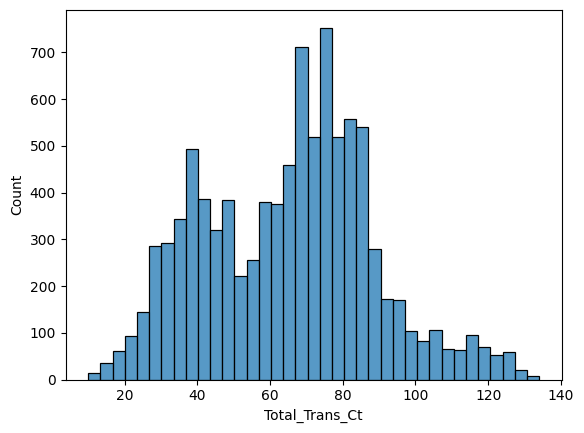

In [68]:
sns.histplot(data=data_noout, x='Total_Trans_Ct')

<Axes: xlabel='Attrition_Flag', ylabel='Count'>

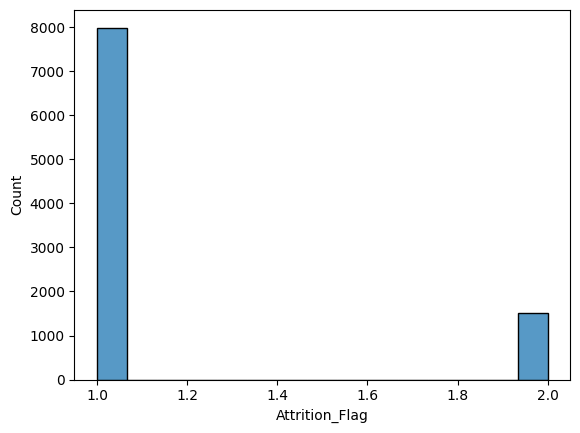

In [69]:
sns.histplot(data=data_noout, x='Attrition_Flag')

<Axes: xlabel='Contacts_Count_12_mon', ylabel='Count'>

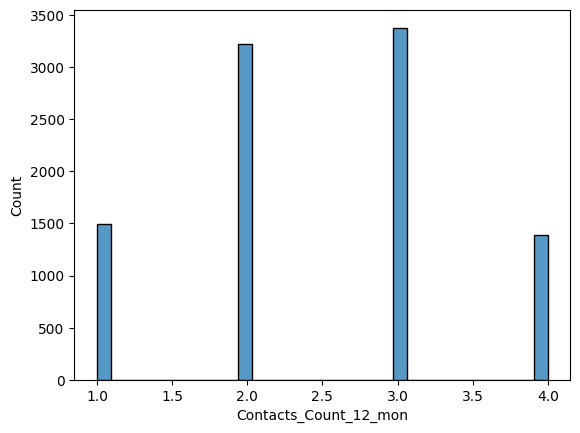

In [70]:
sns.histplot(data=data_noout, x='Contacts_Count_12_mon')

In [71]:
dfSummary(data_noout)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Total_Trans_Ct[int64],Mean (sd) : 65.3 (23.5)min < med < max:10.0 < 68.0 < 134.0IQR (CV) : 36.0 (2.8),124 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACnElEQVR4nO3dT6raUBSA8XObp0SFBBF05gYKHTh0EV1sl9CBK3AHzgSRiOkLxpgO2gc+sP65N6n3XL/fPJjBhzHmHDV1XQvguy/PPgHgHm/PPoEQGWN6ItK1PPxQ1/V7k+cTAkJtmDGmNxqNvidJMrQ5frfbbY0xP4j1M0JtXjdJkuF8Pn9P07R45MAsy+LFYjHcbDZdESHUM4TakjRNi/F4/Mvi0F7jJxMAbqagAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgUeof6DwwRUcjqdOk2fz6sj1AtcJqDKsoyrqvpaFMVPEbF51o8LCPUy6wmo1Wo1XC6X/ePxGLV1cq+IUK+wmYDabrdMP7WAmymoQKhQgVChAqFCBa9vptjmxAdvQ2WbE+e8DVXY5sQZn0MVEbY58Qc3U1CBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBe+f9duqqqojIokxxuZwVp49E2SoeZ53yrL8Np1OoyiKHpq8EmHl2UdBhno4HN7iOO7PZrNiMplsHz3+mSvPjlcCkUAHxoMM9cNgMLAaEXzWyrPrlUAk3IHxoEPVxvVKEPLAeKuhOu48vewNje2V4K8gB8ZbC9V154kbGpxr8x3VeudJhN9wwmetf0a13XniN5xwjidTUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECY36BcRy89nbomlAD4jp47fPQNaEGxGXw2veha0INkO3gdVVViXi6r0WoEBH/97UIFSLi/77WzVD53/rX4uu+1tVQ+d96PKLNr8ZuvaPyv/W4S9tfjd31GZX/rcctbX81xs0UGuXwGffqG9tdoWZZFj/6qvv9PhYRyfM8Xq/X/f95vNbX1nrersff09dvABe8yk4GxzAAAAAASUVORK5CYII="">",0(0.0%)
2,Attrition_Flag[int64],Mean (sd) : 1.2 (0.4)min < med < max:1.0 < 1.0 < 2.0IQR (CV) : 0.0 (3.2),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABtklEQVR4nO3ZTYqDQBCG4apBRDfdiOBhPEQOm0N4GwntIkog6dnNZpj8dDJkvuF9tlpFL14U0XPOBvx1H+8+AHCP6tYN7t6aWV24/5RzXgtngS9XQ3X3tu/7XQihK1m+LMvB3ffEimfdeqLWIYRuHMc1xrg9sjil1EzT1M3zXJsZoeIpN1/9ZmYxxm0YhmPB/rZgBviGjylIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIqN59APwf7t6aWV04fso5rz9dJFS8hLu3fd/vQghdyfyyLAd33/8UK6HiVeoQQjeO4xpj3B4ZTCk10zR18zzXZkao+H0xxm0YhmPBaHvtIh9TkECokECokECokECokECokECokECokECokHDXn6mUUvPo4pRScz6fKzML7v7wwSAnXC6XqrSVW/d8AkonTn3BAu6AAAAAAElFTkSuQmCC"">",0(0.0%)
3,Contacts_Count_12_mon[int64],Mean (sd) : 2.5 (0.9)min < med < max:1.0 < 3.0 < 4.0IQR (CV) : 1.0 (2.7),4 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABt0lEQVR4nO3dQWrqUBiG4XOKiE4SRHAxLqKL7SLcjVzioC0FzR3fSasm1ny5zzNP+AcvnoPgb+37vsDUvTx7ALjG4tkD8K9a67qUshzwiq++7z/GmmcqhDohtdb1drt9bZpmc+87TqfTn1rr29xiFeq0LJum2ez3+4+2bT9vfbjrutXhcNgcj8dlKUWoCZKP0LZtP3e73fudj69HHWYiZhmqI3R+ZhlqcYTOzlxDLaU4QufE96hEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhF+XDs5cHPzLP/4gN/3bahDNzfb2sxYfvpEvXtzs63NjOmqjdMDNjfb2vwfeeQ1cdar0fk9j74mCpWxPPSaKFRG9ahrou9RiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhX/a6/67rVrS/uum51Pp8XpZSm1nrzYAM1l8tlcc/cpTx19tS5Sxkw+zXP/AWHc5+D7iXh/gAAAABJRU5ErkJggg=="">",0(0.0%)
4,Total_Trans_Ct_outliers[bool],1. False,"9,496 (100.0%)",,0(0.0%)
5,Attrition_Flag_outliers[bool],1. False2. True,"7,989 (84.1%)1,507 (15.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABMUlEQVR4nO3bQWrDMBRF0adiQjORMAYvxovoYrsI7cYYa9CETNRByRL+swr3bOAHchNI8Eu9dwEOSdJd0u3qF4LLvXrvj8gD07IsXznnOfIIxtdaO1JK35HBTTnnedu2RynlGXUEYzvP87PWOu/7fpMUF5sklVKe67r+RB3Bv3CPPvARfQB4IzbYEBtsiA02xAYbYoMNscGG2GBDbLAhNtgQG2yIDTbEBhtigw2xwWaS/h6eu/qF4Dqu939qrR211lmGh+cwrtbaIekVeYPBC97CBy+JKR9cXN9s4Z8ajM8y5XPMxDC+8CmfayaG8bmmfPzSBX/qwofYYENssCE22BAbbIgNNsQGG2KDDbHBhthgQ2ywITbYEBtsiA02xAab8CkfM0G8WaZ8jpkYxsfgBTa/Cltq33c4jS0AAAAASU

In [72]:
data_noout = data_noout[['Total_Trans_Ct', 'Attrition_Flag' , 'Contacts_Count_12_mon']]
data_noout

,Total_Trans_Ct,Attrition_Flag,Contacts_Count_12_mon
0,42,1,3
1,33,1,2
3,20,1,1
5,24,1,2
6,31,1,3
...,...,...,...
10122,117,1,3
10123,69,2,3
10124,60,2,4
10125,62,2,3


In [73]:
lambdas = []
nombre = []
df_new = pd.DataFrame()

for x in data_noout.columns:
    df, lamb = stats.boxcox(data_noout[x])
    lambdas.append(lamb)
    nombre.append(x)
    df_new[x] = df

In [74]:
df_lambdas = {
    'nombre' : nombre,
    'lambda' : lambdas
}

df_lambdas = pd.DataFrame(df_lambdas)
df_lambdas

,nombre,lambda
0,Total_Trans_Ct,0.778592
1,Attrition_Flag,-8.978410
2,Contacts_Count_12_mon,0.858678


In [75]:
df_new.describe()

,Total_Trans_Ct,Attrition_Flag,Contacts_Count_12_mon
count,9496.000000,9496.000000,9496.000000
mean,31.573840,0.017641,1.362565
std,9.412194,0.040618,0.822725
min,6.429673,0.000000,0.000000
25%,23.596641,0.000000,0.947242
50%,33.029267,0.000000,1.826741
75%,38.036320,0.000000,1.826741
max,56.904071,0.111157,2.664947


In [76]:
data_bc = df_new

In [77]:
data_bc.describe()

,Total_Trans_Ct,Attrition_Flag,Contacts_Count_12_mon
count,9496.000000,9496.000000,9496.000000
mean,31.573840,0.017641,1.362565
std,9.412194,0.040618,0.822725
min,6.429673,0.000000,0.000000
25%,23.596641,0.000000,0.947242
50%,33.029267,0.000000,1.826741
75%,38.036320,0.000000,1.826741
max,56.904071,0.111157,2.664947


<Axes: xlabel='Total_Trans_Ct', ylabel='Count'>

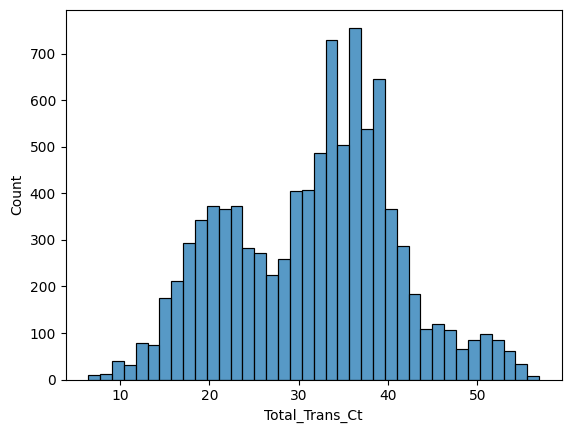

In [78]:
sns.histplot(data_bc,x= 'Total_Trans_Ct')

<Axes: xlabel='Attrition_Flag', ylabel='Count'>

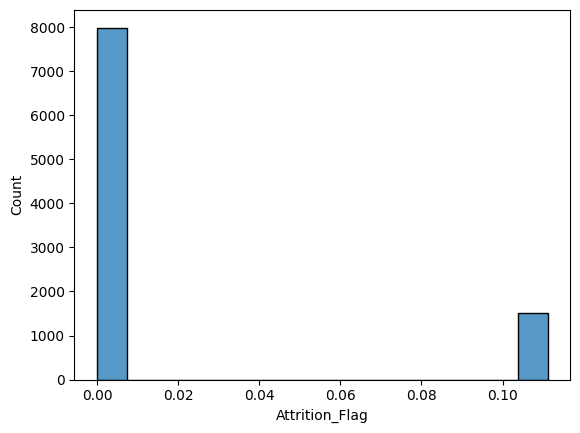

In [79]:
sns.histplot(data_bc,x= 'Attrition_Flag')

<Axes: xlabel='Contacts_Count_12_mon', ylabel='Count'>

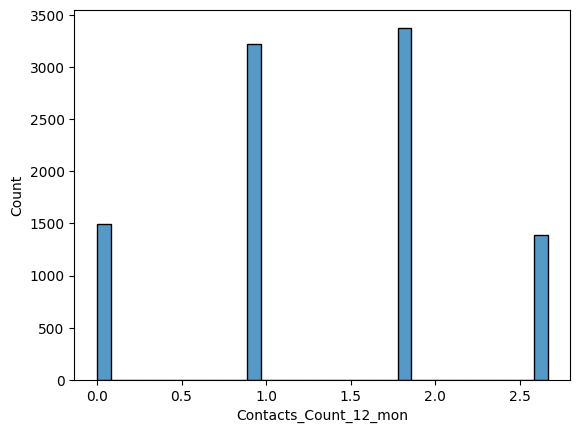

In [80]:
sns.histplot(data_bc,x= 'Contacts_Count_12_mon')

In [81]:
data_bc.describe()

,Total_Trans_Ct,Attrition_Flag,Contacts_Count_12_mon
count,9496.000000,9496.000000,9496.000000
mean,31.573840,0.017641,1.362565
std,9.412194,0.040618,0.822725
min,6.429673,0.000000,0.000000
25%,23.596641,0.000000,0.947242
50%,33.029267,0.000000,1.826741
75%,38.036320,0.000000,1.826741
max,56.904071,0.111157,2.664947


In [82]:
inercia = []
ks = []

for k in range(1,60):
    modelo_iterado = KMeans(n_clusters = k, random_state = 5)
    modelo_iterado.fit(data_bc)
    inercia.append(modelo_iterado.inertia_)
    ks.append(k)

c:\Users\ienriquez\.conda\envs\Clase2023\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\ienriquez\.conda\envs\Clase2023\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\ienriquez\.conda\envs\Clase2023\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\ienriquez\.conda\envs\Clase2023\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\ienriquez\.conda\envs\Clase2023\lib\sit

In [83]:
codo = {
    'inercia': inercia,
    'k': ks
}

codo = pd.DataFrame(codo)

<Axes: xlabel='k', ylabel='inercia'>

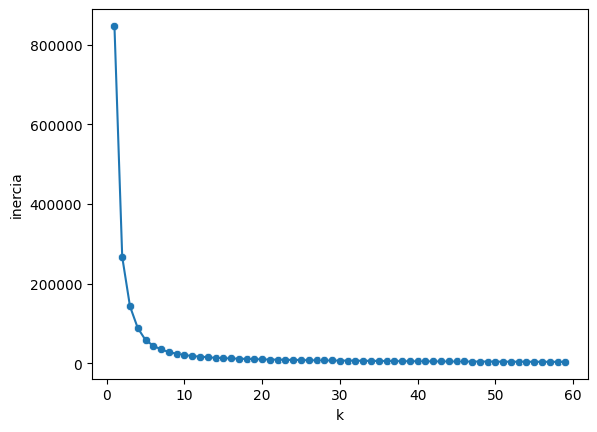

In [84]:
sns.scatterplot(data=codo,x='k',y='inercia',markers=True)
sns.lineplot(data=codo, x='k', y='inercia',)

In [85]:
modelo = KMeans(n_clusters=5,random_state = 10)
modelo.fit(data_bc)

c:\Users\ienriquez\.conda\envs\Clase2023\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=5, random_state=10)

In [86]:
data_noout['cluster'] = modelo.labels_
data_noout

,Total_Trans_Ct,Attrition_Flag,Contacts_Count_12_mon,cluster
0,42,1,3,1
1,33,1,2,3
3,20,1,1,3
5,24,1,2,3
6,31,1,3,3
...,...,...,...,...
10122,117,1,3,2
10123,69,2,3,4
10124,60,2,4,4
10125,62,2,3,4


In [87]:
data_noout.groupby(by='cluster').count()

,Total_Trans_Ct,Attrition_Flag,Contacts_Count_12_mon
cluster,,,
0,2910,2910,2910
1,1703,1703,1703
2,812,812,812
3,1530,1530,1530
4,2541,2541,2541


In [88]:
data_bc.describe()

,Total_Trans_Ct,Attrition_Flag,Contacts_Count_12_mon
count,9496.000000,9496.000000,9496.000000
mean,31.573840,0.017641,1.362565
std,9.412194,0.040618,0.822725
min,6.429673,0.000000,0.000000
25%,23.596641,0.000000,0.947242
50%,33.029267,0.000000,1.826741
75%,38.036320,0.000000,1.826741
max,56.904071,0.111157,2.664947


In [89]:
data_noout.describe()

,Total_Trans_Ct,Attrition_Flag,Contacts_Count_12_mon,cluster
count,9496.000000,9496.000000,9496.000000,9496.000000
mean,65.308551,1.158698,2.491259,1.904065
std,23.456717,0.365414,0.926656,1.621005
min,10.000000,1.000000,1.000000,0.000000
25%,45.000000,1.000000,2.000000,0.000000
50%,68.000000,1.000000,3.000000,2.000000
75%,81.000000,1.000000,3.000000,4.000000
max,134.000000,2.000000,4.000000,4.000000


In [90]:
data_noout.groupby(by='cluster').agg(['min','mean','max'])

Total_Trans_Ct                  Attrition_Flag                \
                   min        mean  max            min      mean max   
cluster                                                                
0                   74   82.040206   95              1  1.025773   2   
1                   39   46.116853   55              1  1.446858   2   
2                   96  109.891626  134              1  1.000000   1   
3                   10   30.587582   38              1  1.301307   2   
4                   56   65.669028   73              1  1.082645   2   

        Contacts_Count_12_mon                
                          min      mean max  
cluster                                      
0                           1  2.307216   4  
1                           1  2.773928   4  
2                           1  2.190887   4  
3                           1  2.661438   4  
4                           1  2.506100   4

# Caracteristicas de clusters

<Axes: xlabel='Contacts_Count_12_mon', ylabel='Total_Trans_Ct'>

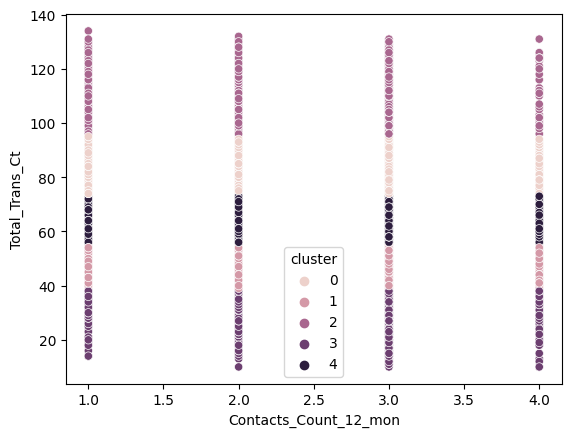

In [91]:
sns.scatterplot(data=data_noout,x='Contacts_Count_12_mon', y='Total_Trans_Ct', hue='cluster')

<Axes: xlabel='Attrition_Flag', ylabel='Total_Trans_Ct'>

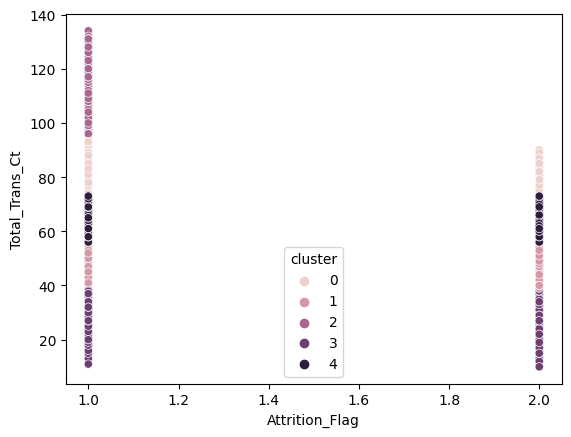

In [92]:
sns.scatterplot(data=data_noout,x='Attrition_Flag', y='Total_Trans_Ct', hue='cluster')

In [93]:
fig = px.scatter_3d(data_noout, x = 'Attrition_Flag',
y = 'Contacts_Count_12_mon',
z = 'Total_Trans_Ct',
color = 'cluster')

fig.show()